In [2]:
%load_ext autoreload
%autoreload 2

import abc
import numpy as np
import matplotlib
import scipy.linalg
matplotlib.rcParams["xtick.labelsize"] = 20
matplotlib.rcParams["ytick.labelsize"] = 20
matplotlib.rcParams["image.cmap"] = "inferno"
matplotlib.rcParams["axes.titlesize"] = 25
matplotlib.rcParams["axes.labelsize"] = 25
from matplotlib import pyplot as plt
from typing import Optional

import modulated_jc
import modulated_tls
import floquet_analysis
import pulse
import single_photon_scattering
import two_photon_scattering
import qutip_utils

import qutip

### Modulated TLS

Here, we consider a two-level system whose frequency is modulated as a function of frequency:
$$H_0 = \omega_e(t) \sigma^\dagger \sigma$$
where $\omega_e(t) = \omega_e + \Delta_e(t)$ with $\Delta(t)$ being a periodic function of time.

In [ ]:
gamma = 1.0
delta_max = 10.0 * gamma
freq = 2 * gamma
delta = pulse.SinusoidalPulse(0, delta_max, 0.0, freq)
tls_obj = modulated_tls.ModulatedTwoLevelSystem(
    0, gamma, delta)
floquet_obj = floquet_analysis.FloquetAnalyzer(tls_obj, 100)

inp_freqs = np.linspace(-20 * gamma, 20 * gamma, 500)
green_funcs_time, green_funcs = single_photon_scattering.compute_single_ph_gfunc(floquet_obj, inp_freqs)

# inp_freqs = np.linspace(-20 * gamma, 20 * gamma, 500)
# green_funcs = single_photon_scattering.compute_single_ph_gfunc(
#     tls_obj, inp_freqs, 20)

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(green_funcs)**2, origin="lower")
plt.subplot(1, 2, 2)
plt.plot(np.sum(np.abs(green_funcs)**2, axis=1))

In [ ]:
# Simulate with qutip.
res = qutip_utils.compute_single_ph_expectation(
    tls_obj, np.linspace(-20 * gamma, 20 * gamma, 500),
    0.1, 20, 100)

In [ ]:
# Match the scattering matrix result and qutip simulations. For this, we first
# need to compute the inverse fourier transform of the frequency-domain
# Green's function.
# times = np.linspace(0, 2 * np.pi / freq, 100)
# freqs = np.arange(-20, 21) * freq
# fft_matrix = np.exp(-1.0j * times[:, np.newaxis] @ freqs[np.newaxis, :])
# green_func_time = fft_matrix @ green_funcs


plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.imshow(res, origin="lower", aspect=0.15)
plt.xlabel("$\Omega t / 2\pi$")
plt.ylabel(r"$(\nu - \omega_e) / \gamma$")
plt.subplot(1, 2, 2)
plt.imshow(np.abs(green_funcs_time)**2, origin="lower", aspect=0.25)



In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(np.mean(res, axis=1))
plt.plot(np.sum(np.abs(green_funcs)**2, axis=1), '--k')

In [ ]:
# Fast modulation regime.
gamma = 1.0
delta_max = 5.0 * gamma
freq = 5.0 * gamma
delta = pulse.SinusoidalPulse(0, delta_max, 0.0, freq)
tls_obj = modulated_tls.ModulatedTwoLevelSystem(
    0, gamma, delta)
floquet_obj = floquet_analysis.FloquetAnalyzer(tls_obj, 500)

inp_freqs = np.linspace(-20 * gamma, 20 * gamma, 500)
_, green_funcs_fast = single_photon_scattering.compute_single_ph_gfunc(floquet_obj, inp_freqs)
trans_fast = np.sum(np.abs(green_funcs_fast)**2, axis=1)

# Intermediate modulation regime.
gamma = 1.0
delta_max = 5.0 * gamma
freq = 2.5 * gamma
delta = pulse.SinusoidalPulse(0, delta_max, 0.0, freq)
tls_obj = modulated_tls.ModulatedTwoLevelSystem(
    0, gamma, delta)
floquet_obj = floquet_analysis.FloquetAnalyzer(tls_obj, 500)

inp_freqs = np.linspace(-20 * gamma, 20 * gamma, 500)
_, green_funcs_inter = single_photon_scattering.compute_single_ph_gfunc(floquet_obj, inp_freqs)
trans_inter = np.sum(np.abs(green_funcs_inter)**2, axis=1)

# Slow modulation regime.
gamma = 1.0
delta_max = 5.0 * gamma
freq = 0.25 * gamma
delta = pulse.SinusoidalPulse(0, delta_max, 0.0, freq)
tls_obj = modulated_tls.ModulatedTwoLevelSystem(
    0, gamma, delta)
floquet_obj = floquet_analysis.FloquetAnalyzer(tls_obj, 2000)

inp_freqs = np.linspace(-20 * gamma, 20 * gamma, 500)
green_funcs_time, green_funcs_slow = single_photon_scattering.compute_single_ph_gfunc(floquet_obj, inp_freqs)
trans_slow = np.sum(np.abs(green_funcs_slow)**2, axis=1)

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(inp_freqs, 0.25 * trans_fast, label="$\Omega / \Delta_0 = 1$")
plt.plot(inp_freqs, 0.25 * trans_inter, label="$\Omega / \Delta_0 = 0.5$")
plt.plot(inp_freqs, 0.25 * trans_slow, label="$\Omega / \Delta_0 = 0.05$")
plt.xlabel(r"Input frequency $(\nu - \omega_0) / \gamma$")
plt.ylabel(r"Transmission $T(\nu)$")
plt.legend(fontsize=20, edgecolor="k")
plt.tight_layout()
plt.savefig("results/tls_figures/full_tran.pdf")

In [ ]:
gamma = 1.0
delta_max = 5.0 * gamma
freq = 0.1 * gamma
delta = pulse.SinusoidalPulse(0, delta_max, 0.0, freq)
tls_obj = modulated_tls.ModulatedTwoLevelSystem(
    0, gamma, delta)
floquet_obj = floquet_analysis.FloquetAnalyzer(tls_obj, 2000)

inp_freqs = np.linspace(-20 * gamma, 20 * gamma, 500)
green_funcs_time, green_funcs_slow = single_photon_scattering.compute_single_ph_gfunc(floquet_obj, inp_freqs)
trans_slow = np.sum(np.abs(green_funcs_slow)**2, axis=1)

plt.plot(trans_slow)

In [ ]:
gamma = 1.0
delta_max = 5.0 * gamma
freq = 0.05 * gamma
delta = pulse.SinusoidalPulse(0, delta_max, 0.0, freq)
tls_obj = modulated_tls.ModulatedTwoLevelSystem(
    0, gamma, delta)
floquet_obj = floquet_analysis.FloquetAnalyzer(tls_obj, 2000)

inp_freqs = np.linspace(-20 * gamma, 20 * gamma, 500)
green_funcs_time, green_funcs_slow = single_photon_scattering.compute_single_ph_gfunc(floquet_obj, inp_freqs)
trans_slow = np.sum(np.abs(green_funcs_slow)**2, axis=1)

plt.plot(trans_slow)

In [ ]:
plt.figure(figsize=(6, 6))
num_sb = 2
for k in range(-num_sb, num_sb + 1):
    gfunc_slow = green_funcs_slow[:, (green_funcs_slow.shape[1] - 1) // 2 + k]
    gfunc_inter = green_funcs_inter[:, (green_funcs_inter.shape[1] - 1) // 2 + k]
    gfunc_fast = green_funcs_fast[:, (green_funcs_fast.shape[1] - 1) // 2 + k]
    plt.plot(inp_freqs, np.abs(gfunc_fast) + 1.5 * k, color="C0")
    plt.plot(inp_freqs, np.abs(gfunc_inter) + 1.5 * k, color="C1")
    plt.plot(inp_freqs, np.abs(gfunc_slow) + 1.5 * k, color="C2")
    if k >= 0:
        plt.text(-20, 1.5 * k + 0.25, r"$S_{}(\nu)$".format(str(k)),
                 fontsize=17)
    else:
        plt.text(-20, 1.5 * k + 0.25, r"$S_-$"+r"$_{}(\nu)$".format(str(-k)),
                 fontsize=17)
plt.xlabel(r"Input frequency $(\nu - \omega_0) / \gamma$")
plt.yticks([])
plt.tight_layout()
plt.savefig("results/tls_figures/individual_sb.pdf")

In [ ]:
# Analyzing the two-photon correlation function.
gamma = 1.0
delta_max = 5.0 * gamma
freq_fast = 5.0 * gamma
num_per_fast = 10
delta = pulse.SinusoidalPulse(0, delta_max, 0.0, freq_fast)
tls_obj = modulated_tls.ModulatedTwoLevelSystem(
    0, gamma, delta)
floquet_obj = floquet_analysis.FloquetAnalyzer(tls_obj, 800)
# The correlation function.
input_freqs = np.array([0])
psi_out_fast = two_photon_scattering.compute_two_ph_output(
    floquet_obj, input_freqs, num_per_fast)
g2_fast = two_photon_scattering.compute_g2(
    floquet_obj, input_freqs, num_per_fast)

In [ ]:
# Analyzing the two-photon correlation function.
gamma = 1.0
delta_max = 5.0 * gamma
freq_inter = 2.5 * gamma
num_per_inter = 8
delta = pulse.SinusoidalPulse(0, delta_max, 0.0, freq_inter)
tls_obj = modulated_tls.ModulatedTwoLevelSystem(
    0, gamma, delta)
floquet_obj = floquet_analysis.FloquetAnalyzer(tls_obj, 800)
# The correlation function.
input_freqs = np.array([0])
psi_out_inter = two_photon_scattering.compute_two_ph_output(
    floquet_obj, input_freqs, num_per_inter)
g2_inter = two_photon_scattering.compute_g2(
    floquet_obj, input_freqs, num_per_inter)

In [ ]:
# Analyzing the two-photon correlation function.
gamma = 1.0
delta_max = 5.0 * gamma
freq_slow = 0.25 * gamma
num_per_slow = 4
delta = pulse.SinusoidalPulse(0, delta_max, 0.0, freq_slow)
tls_obj = modulated_tls.ModulatedTwoLevelSystem(
    0, gamma, delta)
floquet_obj = floquet_analysis.FloquetAnalyzer(tls_obj, 1000)
# The correlation function.
input_freqs = np.array([0])
psi_out_slow = two_photon_scattering.compute_two_ph_output(
    floquet_obj, input_freqs, num_per_slow)
g2_slow = two_photon_scattering.compute_g2(
    floquet_obj, input_freqs, num_per_slow)

In [ ]:
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.imshow(np.abs(psi_out_fast[0])**2, origin="lower",
           extent=[0, 2 * np.pi * gamma * num_per_fast / freq_fast,
                   0, 2 * np.pi * gamma / freq_fast],
           aspect=2.2)
plt.title(r"$G(t, \tau)$")
plt.text(x=0.35, y=0.95, s="$\Omega / \Delta_0 = 1$", color="w", fontsize=25)
plt.yticks([0, 1])
plt.subplot(3, 1, 2)
plt.imshow(np.abs(psi_out_inter[0])**2,
           extent=[0, 2 * np.pi * gamma * num_per_inter / freq_inter,
                   0, 2 * np.pi * gamma / freq_inter], aspect=1.9)
plt.xticks([0, 5, 10, 15, 20])
plt.ylabel("Initial time $\gamma t$")
plt.title("$\Omega / \Delta_0 = 0.5$", x=0.15, y=0.75, color="w")
plt.subplot(3, 1, 3)
plt.imshow(np.abs(psi_out_slow[0])**2,
           extent=[0, 2 * np.pi * gamma * num_per_slow / freq_slow,
                   0, 2 * np.pi * gamma / freq_slow])
plt.title("$\Omega / \Delta_0 = 0.05$", x=0.16, y=0.75, color="w")
plt.xlabel(r"Delay $\gamma \tau$")
plt.tight_layout()
plt.savefig("results/tls_figures/psi_out.pdf")

In [ ]:
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(np.linspace(0, 2 * np.pi * num_per_fast / freq_fast, g2_fast[0].size),
         g2_fast[0])
plt.text(x=10.3, y=0, s=r"$\Omega/ \Delta = 1$", fontsize=20)
plt.title(r"Two-photon correlation $g^{(2)}(\tau)$", y=1.05)
plt.subplot(3, 1, 2)
plt.plot(np.linspace(0, 2 * np.pi * num_per_inter / freq_inter, g2_inter[0].size),
         g2_inter[0])
plt.text(x=16.5, y=0, s=r"$\Omega/ \Delta = 0.5$", fontsize=20)
plt.subplot(3, 1, 3)
plt.plot(np.linspace(0, 2 * np.pi * num_per_slow / freq_slow, g2_slow[0].size),
         g2_slow[0])
plt.text(x=83, y=0, s=r"$\Omega/ \Delta = 0.05$", fontsize=20)
plt.xlabel(r"Delay $\gamma \tau$")

plt.tight_layout()
plt.savefig("results/tls_figures/g2.pdf")

## Modulated JC system

Here, we consider a jaynes-cumming system where both the cavity and the emitter frequency is modulated as a function of time:
$$H_0 = \omega_c a^\dagger a + (\omega_e + \delta_e \cos \theta(t)) \sigma^\dagger \sigma + g (e^{i\theta(t)}a\sigma^\dagger + e^{-i\theta(t)}\sigma a^\dagger)$$
Where $\theta(t)$ is chosen such that $e^{i\theta(t)}$ has a period $2\pi / \Omega$.

### Single photon transmission

In [24]:
g = 5.0
kappa = 4.0
delta_e = pulse.ConstantPulse(0.0)
delta_c = pulse.ConstantPulse(0)
input_freqs = np.linspace(-15, 15, 2000)

# Simulate a constant JC system.
coup_const = pulse.ConstantPulse(g)
jc_obj = modulated_jc.ModulatedJCSystem(
        kappa, delta_e, delta_c, coup_const, 2 * np.pi / freq)
floquet_obj = floquet_analysis.FloquetAnalyzer(jc_obj, 1000)
_, gfuncs_const =  .compute_single_ph_gfunc(
        floquet_obj, input_freqs)


In [37]:
# Iterate over the polynomial index.
freq =1.0
green_funcs_1 = []
for poly_ind in np.arange(1, 4):
    coup_const = pulse.PolynomialPhasePulse(g, poly_ind, freq)
    jc_obj = modulated_jc.ModulatedJCSystem(
        kappa, delta_e, delta_c, coup_const, 2 * np.pi / freq)
    floquet_obj = floquet_analysis.FloquetAnalyzer(jc_obj, 1000)
    _, gfuncs = single_photon_scattering.compute_single_ph_gfunc(
        floquet_obj, input_freqs)
    green_funcs_1.append(gfuncs)          

In [38]:
# Iterate over the polynomial index.
freq = 2.0
green_funcs_2 = []
for poly_ind in np.arange(1, 4):
    coup_const = pulse.PolynomialPhasePulse(g, poly_ind, freq)
    jc_obj = modulated_jc.ModulatedJCSystem(
        kappa, delta_e, delta_c, coup_const, 2 * np.pi / freq)
    floquet_obj = floquet_analysis.FloquetAnalyzer(jc_obj, 1000)
    _, gfuncs = single_photon_scattering.compute_single_ph_gfunc(
        floquet_obj, input_freqs)
    green_funcs_2.append(gfuncs)  

Text(0.5, 1.0, '$T(\\nu)$')

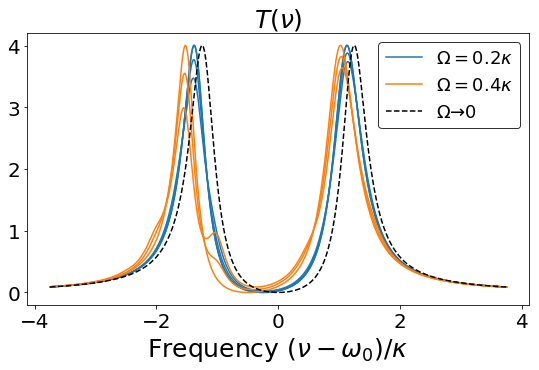

In [56]:
plt.figure(figsize=(9, 5))
for k, gfuncs in enumerate(green_funcs_1):
    if k == 0:
        plt.plot(input_freqs / kappa,
                 np.sum(np.abs(gfuncs)**2, axis=1), color="C0",
                 label=r"$\Omega = 0.2 \kappa$")
    plt.plot(input_freqs / kappa,
             np.sum(np.abs(gfuncs)**2, axis=1), color="C0")

for k, gfuncs in enumerate(green_funcs_2):
    if k == 0:
        plt.plot(input_freqs / kappa,
                 np.sum(np.abs(gfuncs)**2, axis=1), color="C1",
                 label=r"$\Omega = 0.4 \kappa$")
    else:
        plt.plot(input_freqs / kappa,
                 np.sum(np.abs(gfuncs)**2, axis=1), color="C1")
    
plt.plot(input_freqs / kappa, np.sum(np.abs(gfuncs_const)**2, axis=1), '--k', label=r"$\Omega \to 0$")
plt.legend(fontsize=18, edgecolor="k")
plt.xlabel(r"Frequency $(\nu - \omega_0) / \kappa$")
plt.title(r"$T(\nu)$")


In [61]:
# Iterate over the polynomial index.
freq = 1.0
g2s_1 = []
for poly_ind in np.arange(1, 4):
    coup_const = pulse.PolynomialPhasePulse(g, poly_ind, freq)
    jc_obj = modulated_jc.ModulatedJCSystem(
        kappa, delta_e, delta_c, coup_const, 2 * np.pi / freq)
    floquet_obj = floquet_analysis.FloquetAnalyzer(jc_obj, 1000)
    g2 = two_photon_scattering.compute_equal_time_g2(
        floquet_obj, input_freqs, True)
    g2s_1.append(g2)   
    
    
# Iterate over the polynomial index.
freq = 2.0
g2s_2 = []
for poly_ind in np.arange(1, 4):
    coup_const = pulse.PolynomialPhasePulse(g, poly_ind, freq)
    jc_obj = modulated_jc.ModulatedJCSystem(
        kappa, delta_e, delta_c, coup_const, 2 * np.pi / freq)
    floquet_obj = floquet_analysis.FloquetAnalyzer(jc_obj, 1000)
    g2 = two_photon_scattering.compute_equal_time_g2(
        floquet_obj, input_freqs, True)
    g2s_2.append(g2)   
    
    
# Iterate over the polynomial index.
freq = 2.0
coup_const = pulse.ConstantPulse(g)
jc_obj = modulated_jc.ModulatedJCSystem(
    kappa, delta_e, delta_c, coup_const, 2 * np.pi / freq)
floquet_obj = floquet_analysis.FloquetAnalyzer(jc_obj, 1000)
g2_const = two_photon_scattering.compute_equal_time_g2(
    floquet_obj, input_freqs, True)

Text(0.5, 1.0, '$G^2(\\nu)$')

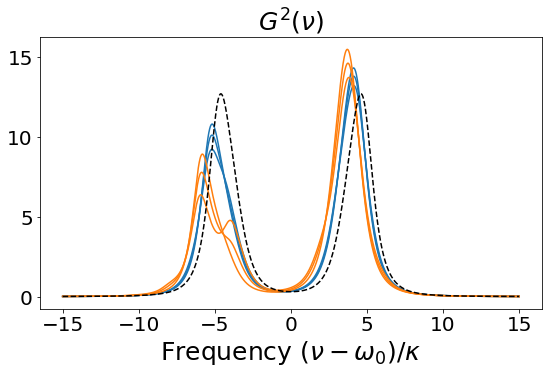

In [65]:
plt.figure(figsize=(9, 5))
for g2 in g2s_1:
    plt.plot(input_freqs, g2, color="C0")
    
for g2 in g2s_2:
    plt.plot(input_freqs, g2, color="C1")
    
plt.plot(input_freqs, g2_const, '--k')
plt.xlabel(r"Frequency $(\nu - \omega_0) / \kappa$")
plt.title(r"$G^2(\nu)$")


In [209]:
# Study a JC system in which both the emitter resonance and the phase of the
# coupling constant have been modulated simulatenously.
g = 10.0 # Magnitude of the light-matter interaction.
delta_g = 8.5
kappa = 5.0
freq = 0.1
amp_ind = 4
poly_inds = [1, 2, 3]
trans_full = []
trans_adj = []
for poly_ind in poly_inds:
    delta_e = pulse.ConstantPulse(0)
    delta_c = pulse.ConstantPulse(0)
    input_freqs = np.linspace(-50, 50, 2000)

    coup_const = pulse.PolynomialAmplitudePhasePulse(
        g, delta_g, amp_ind, poly_ind, freq)
    jc_obj = modulated_jc.ModulatedJCSystem(
        kappa, delta_e, delta_c, coup_const, 2 * np.pi / freq)
    floquet_obj = floquet_analysis.FloquetAnalyzer(jc_obj, 1000)
    _, gfuncs = single_photon_scattering.compute_single_ph_gfunc(
        floquet_obj, input_freqs)
    trans = np.sum(np.abs(gfuncs)**2, axis=1)
    trans_ad = single_photon_scattering.compute_single_ph_gfunc_adiabatically(
            jc_obj, input_freqs, 1000)
    trans_full.append(trans)
    trans_adj.append(trans_ad)

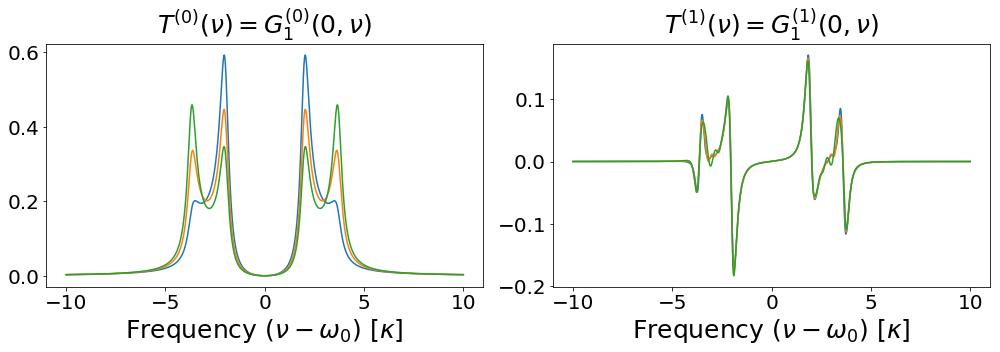

In [232]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
for i, trans in enumerate(trans_adj):
    plt.plot(input_freqs / kappa, 0.25 * trans, label=r"$C_{}$".format(i + 1))
#plt.legend(fontsize=20, edgecolor="k")
plt.title(r"$T^{(0)}(\nu) = G^{(0)}_1(0, \nu)$", y=1.015)
plt.xlabel(r"Frequency $(\nu - \omega_0)\ [\kappa]$")
    
plt.subplot(1, 2, 2)
for i, (trans, trans_ad) in enumerate(zip(trans_full, trans_adj)):
    plt.plot(input_freqs / kappa, 0.25 * (trans - trans_ad) / freq,
             label=r"$C_{}$".format(i + 1))
#plt.legend(fontsize=20, edgecolor="k", loc="lower right")
plt.title(r"$T^{(1)}(\nu) = G^{(1)}_1(0, \nu)$", y=1.015)
plt.xlabel(r"Frequency $(\nu - \omega_0)\ [\kappa]$")
plt.tight_layout()
plt.savefig("results/theory_figures/geometry_one_ph.pdf")

In [10]:
freq = 0.2
num_sb = 1000

g = 10.0 # Magnitude of the light-matter interaction.
delta_g = 8.5
kappa = 5.0
freq_1 = 0.05
freq_2 = 0.06
amp_ind = 4
poly_inds = [1, 2, 3]
g2_ads = []
g2s = []
for poly_ind in poly_inds:
    delta_e = pulse.ConstantPulse(0)
    delta_c = pulse.ConstantPulse(0)
    input_freqs = np.linspace(-50, 50, 2000)

    coup_const = pulse.PolynomialAmplitudePhasePulse(
        g, delta_g, amp_ind, poly_ind, freq_1)
    jc_obj = modulated_jc.ModulatedJCSystem(
        kappa, delta_e, delta_c, coup_const, 2 * np.pi / freq_1)
    floquet_obj = floquet_analysis.FloquetAnalyzer(jc_obj, num_sb)

    g2_1 = two_photon_scattering.compute_equal_time_g2(
            floquet_obj, input_freqs, True)
    coup_const = pulse.PolynomialAmplitudePhasePulse(
        g, delta_g, amp_ind, poly_ind, freq_2)
    jc_obj = modulated_jc.ModulatedJCSystem(
        kappa, delta_e, delta_c, coup_const, 2 * np.pi / freq_2)
    floquet_obj = floquet_analysis.FloquetAnalyzer(jc_obj, num_sb)
    g2_2 = two_photon_scattering.compute_equal_time_g2(
            floquet_obj, input_freqs, True)
    
    g2_ads.append(g2_1)
    g2s.append(g2_2)

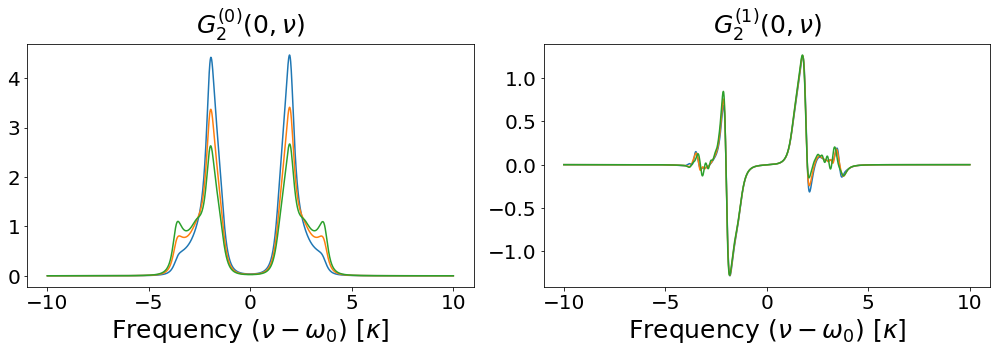

In [217]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
for k, g2_ad in enumerate(g2_ads):
    plt.plot(input_freqs / kappa, g2_ad, label=r"$\theta_{}(t)$".format(k + 1))
#plt.legend(fontsize=20, edgecolor="k")
plt.title(r"$G^{(0)}_2(0, \nu)$", y=1.015)
plt.xlabel(r"Frequency $(\nu - \omega_0)\ [\kappa]$")

plt.subplot(1, 2, 2)
for k, (g2_ad, g2) in enumerate(zip(g2_ads, g2s)):
    plt.plot(input_freqs / kappa, (g2 - g2_ad) / (freq_2 - freq_1), label=r"$\theta_{}(t)$".format(k + 1))
#plt.legend(fontsize=20, edgecolor="k")
plt.title(r"$G^{(1)}_2(0, \nu)$", y=1.015)
plt.xlabel(r"Frequency $(\nu - \omega_0)\ [\kappa]$")
plt.tight_layout()
plt.savefig("results/theory_figures/geometry_two_ph.pdf")


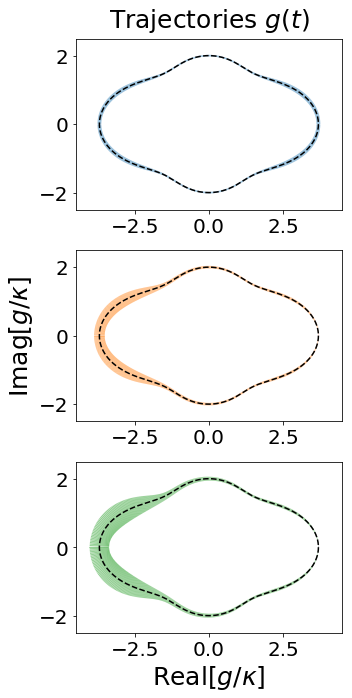

In [231]:
from matplotlib.collections import LineCollection

poly_inds = [1, 2, 3]
fig, a = plt.subplots(nrows=3, ncols=1, figsize=(5, 9.8))
for k, poly_ind in enumerate(poly_inds):
    coup_const = pulse.PolynomialAmplitudePhasePulse(
            10, 8.5, 4, poly_ind, freq)
    times = np.linspace(0, coup_const.period, 2000)
    coup_const_vals = np.array([coup_const(t) / kappa for t in times])
    coup_const_grad = np.abs(np.roll(coup_const_vals, 1) - coup_const_vals)
    line_coll = [[(np.real(coup_const_vals[i]), np.imag(coup_const_vals[i])),
                  (np.real(coup_const_vals[i + 1]), np.imag(coup_const_vals[i + 1]))]
                  for i in range(coup_const_vals.size - 1)]
#    line_coll = [[(0, 0), (2, 2)], [(2, 2), (3, 4)]]
    lc = LineCollection(line_coll, colors="C{}".format(k), linewidth=3000 * coup_const_grad**1.5, alpha=0.5)
    a[k].add_collection(lc)
    a[k].set_xlim([-4.5, 4.5])
    a[k].set_ylim([-2.5, 2.5])
    a[k].plot(np.real(coup_const_vals), np.imag(coup_const_vals), color="k", linestyle='--', linewidth=1.5)

a[0].set_title("Trajectories $g(t)$", y = 1.03)
a[2].set_xlabel("$\mathrm{Real}[g / \kappa]$")
a[1].set_ylabel("$\mathrm{Imag}[g / \kappa]$")
plt.tight_layout()
plt.savefig("results/theory_figures/trajectories.pdf")


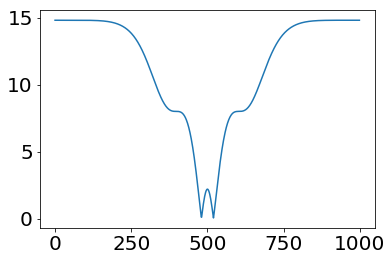

In [137]:
plt.plot(coup_const_grad)

[[0.0 0.0]
 [1.0 1.0]
 [2.0 2.0]
 [3.0 3.0]
 [4.0 4.0]
 [5.0 5.0]
 [6.0 6.0]
 [7.0 7.0]
 [8.0 8.0]
 [9.0 9.0]
 [10.0 10.0]
 [11.0 11.0]
 [12.0 12.0]
 [13.0 13.0]
 [14.0 14.0]
 [15.0 15.0]
 [16.0 16.0]
 [17.0 17.0]
 [18.0 18.0]
 [19.0 19.0]
 [20.0 20.0]
 [21.0 21.0]
 [22.0 22.0]
 [23.0 23.0]
 [24.0 24.0]
 [25.0 25.0]
 [26.0 26.0]
 [27.0 27.0]
 [28.0 28.0]
 [29.0 29.0]
 [30.0 30.0]
 [31.0 31.0]
 [32.0 32.0]
 [33.0 33.0]
 [34.0 34.0]
 [35.0 35.0]
 [36.0 36.0]
 [37.0 37.0]
 [38.0 38.0]
 [39.0 39.0]
 [40.0 40.0]
 [41.0 41.0]
 [42.0 42.0]
 [43.0 43.0]
 [44.0 44.0]
 [45.0 45.0]
 [46.0 46.0]
 [47.0 47.0]
 [48.0 48.0]
 [49.0 49.0]
 [50.0 50.0]
 [-- --]
 [-- --]
 [-- --]
 [-- --]
 [-- --]
 [-- --]
 [-- --]
 [-- --]
 [-- --]
 [60.0 60.0]
 [61.0 61.0]
 [62.0 62.0]
 [63.0 63.0]
 [64.0 64.0]
 [65.0 65.0]
 [66.0 66.0]
 [67.0 67.0]
 [68.0 68.0]
 [69.0 69.0]
 [70.0 70.0]
 [71.0 71.0]
 [72.0 72.0]
 [73.0 73.0]
 [74.0 74.0]
 [75.0 75.0]
 [76.0 76.0]
 [77.0 77.0]
 [78.0 78.0]
 [79.0 79.0]
 [80.0 80.0]
 [8

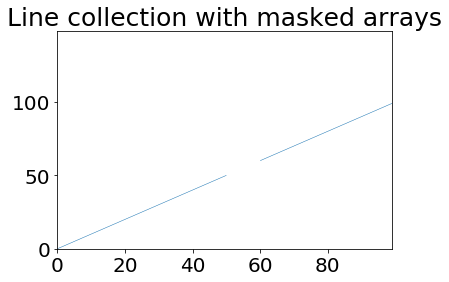

In [89]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors

import numpy as np

x = np.arange(100)
# Here are many sets of y to plot vs x
ys = x[:50, np.newaxis] + x[np.newaxis, :]

segs = np.zeros((50, 100, 2))
segs[:, :, 1] = ys
segs[:, :, 0] = x

# Mask some values to test masked array support:
segs = np.ma.masked_where((segs > 50) & (segs < 60), segs)

# We need to set the plot limits.
fig, ax = plt.subplots()
ax.set_xlim(x.min(), x.max())
ax.set_ylim(ys.min(), ys.max())

print(segs[0])

# colors is sequence of rgba tuples
# linestyle is a string or dash tuple. Legal string values are
#          solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq)
#          where onoffseq is an even length tuple of on and off ink in points.
#          If linestyle is omitted, 'solid' is used
# See :class:`matplotlib.collections.LineCollection` for more information
colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

line_segments = LineCollection([segs[0]], linewidths=(0.5, 1, 1.5, 2),
                               colors=colors, linestyle='solid')
ax.add_collection(line_segments)
ax.set_title('Line collection with masked arrays')
plt.show()

In [ ]:
poly_ind = 3
coup_const = pulse.PolynomialAmplitudePhasePulse(
        10, 8.5, 10, poly_ind, freq)
times = np.linspace(0, coup_const.period, 1000)
coup_const_list = [coup_const(t) / kappa for t in times]
plt.plot(np.real(coup_const_list), np.imag(coup_const_list), 'k')
plt.xlabel("Re[$g(t) / \kappa$] ")
plt.ylabel("Im[$g(t) / \kappa$] ")

In [ ]:
# Study a JC system in which both the emitter resonance and the phase of the
# coupling constant have been modulated simulatenously.
g = 10.0 # Magnitude of the light-matter interaction.
delta = 8.0
kappa = 5.0
freq = 0.2
poly_inds = [1, 2, 3]
trans_full = []
trans_adj = []
for poly_ind in poly_inds:
    delta_e = pulse.PolynomialPhaseCosinePulse(delta, poly_ind, freq)
    delta_c = pulse.ConstantPulse(0)
    input_freqs = np.linspace(-50, 50, 2000)

    coup_const = pulse.PolynomialPhasePulse(g, poly_ind, freq)
    jc_obj = modulated_jc.ModulatedJCSystem(
        kappa, delta_e, delta_c, coup_const, 2 * np.pi / freq)
    floquet_obj = floquet_analysis.FloquetAnalyzer(jc_obj, 1000)
    _, gfuncs = single_photon_scattering.compute_single_ph_gfunc(
        floquet_obj, input_freqs)
    trans = np.sum(np.abs(gfuncs)**2, axis=1)
    trans_ad = single_photon_scattering.compute_single_ph_gfunc_adiabatically(
            jc_obj, input_freqs, 1000)
    trans_full.append(trans)
    trans_adj.append(trans_ad)

### Two-photon correlation.

In [ ]:
w = 1
kappas = [6.818, 5.404, 2.205]
ks = [2.451, 4.825, 6.902]
Cs = [0.421, 0.805, 0.978]
Bs = [1.244, 1.208, -1.207]
num_pts = 1000
z = w / num_pts + np.linspace(0.5 * w / num_pts, w - 0.5 * w / num_pts, num_pts)

coeffs = []
for kappa, k, C, B in zip(kappas, ks, Cs, Bs):
    coeffs.append(C * B * 2 * np.sum(np.cos(k * (z - 0.5 * w)) * np.exp(-kappa * z)) * (w / num_pts))

In [ ]:
coeffs[0] * np.exp(-kappas[0] * 0.5)

In [ ]:
coeffs[1] * np.exp(-kappas[1] * 0.5)